In [282]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit
from mpl_toolkits.mplot3d import Axes3D


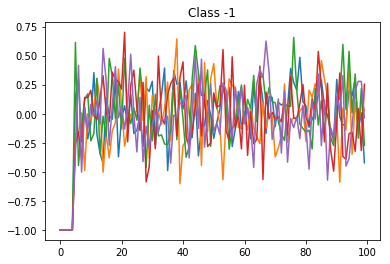

In [609]:
np.random.seed(71)

NOISE_STD = 0.25

total_samples_in_each_class = 5
tsc = total_samples_in_each_class

timestep = 100

X = np.random.normal(0, NOISE_STD, (total_samples_in_each_class*2, timestep))
X[:total_samples_in_each_class, 0:5] = -1

X[-total_samples_in_each_class:, 0:5] = 1

# class1 = np.random.normal(0, NOISE_STD, (5, timestep))
# class1[:, 0] = 1


# ys2 = np.sin(x1*2 + 0.5) + np.random.normal(0, NOISE_STD, x1.shape[0])
# ys3 = np.sin(x1*2 + 1) + np.random.normal(0, NOISE_STD, x1.shape[0])
# print(X)
plt.title('Class -1')
for i in range(5):
    plt.plot(X[i, :]) 

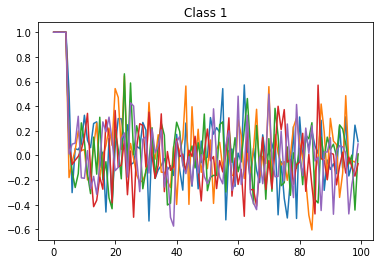

In [610]:
plt.title('Class 1')
for i in range(5, 10):
    plt.plot(X[i, :]) 

In [611]:
NO_RESERVIORS = 3

In [612]:
np.random.seed(71)
W_rec = np.random.uniform(-0.5, 0.5, (NO_RESERVIORS, NO_RESERVIORS)) + 0.00001* np.eye(NO_RESERVIORS, NO_RESERVIORS)
# eig_values, _ = np.linalg.eig(W_rec)
# radius = np.max(eig_values)
# print("Spectral radius : %f" % radius)
# W_rec = W_rec/radius

W_in = np.random.normal(0, 0.5, (1, NO_RESERVIORS))
# b_in = 1
W_out = np.random.normal(0, 0.5, (NO_RESERVIORS,2))

In [613]:
def forward(x, normalize=False, alpha=0.5, normalize_spectral_r=0, title='Dummy'):
    total_steps = x.shape[1]
    h = np.zeros((x.shape[0], NO_RESERVIORS, total_steps))
    ht = np.zeros((x.shape[0], NO_RESERVIORS))
    
    w_rec_norm = W_rec
    eig_values, _ = np.linalg.eig(w_rec_norm)
    radius = np.max(eig_values)
    print("Spectral radius : %f" % radius)
    if normalize_spectral_r > 0:
        w_rec_norm = normalize_spectral_r * W_rec / radius
       
        eig_values, _ = np.linalg.eig(w_rec_norm)
        radius_norm = np.max(eig_values)
        print("Spectral radius after normalization : %f" % radius_norm)

    
    for i in range(total_steps):

        xt = np.dot(x[:, i].reshape(-1, 1), W_in)

        ht_tilde = np.tanh(xt + np.dot(ht, w_rec_norm))
        ht = (1-alpha)*ht + alpha*ht_tilde


        h[:, :, i] = ht

    return h, None

res = forward(X, normalize_spectral_r=0.8)

print(res[0].shape)

Spectral radius : 0.734625
Spectral radius after normalization : 0.800000
(10, 3, 100)


In [614]:
cl_dict = {
    'Class -1': 'r',
    'Class 1': 'b'
}

Spectral radius : 0.734625
Spectral radius after normalization : 1.000000


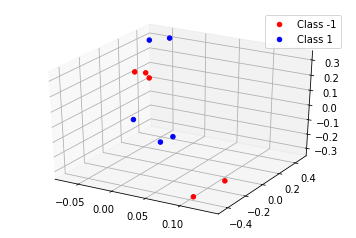

In [634]:
def plot_3d(data, title=''):
    ax = plt.axes(projection='3d')

    phi_X = data[:, :, -1]
    class_1 = phi_X[:tsc]
    class_2 = phi_X[-tsc:]

    for c, cl in zip(('Class -1','Class 1'), (class_1, class_2)):
        ax.scatter3D(cl[:, 0], cl[:, 1], cl[:, 2], color=cl_dict[c], label=c, alpha=1);
    plt.title(title)
    plt.legend()


res_default = forward(X,  normalize_spectral_r=1)
plot_3d(res_default[0], title="")

Spectral radius : 0.734625
Spectral radius after normalization : 2.000000


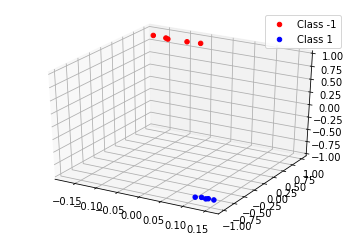

In [633]:
res_norm_W_rec = forward(X, normalize_spectral_r=2)
plot_3d(res_norm_W_rec[0], title="")

In [627]:
# res_better = forward(X, alpha=0.3, normalize_spectral_r=0.5)
# plot_3d(res_better[0], title="$\phi(x)$ with normalization")

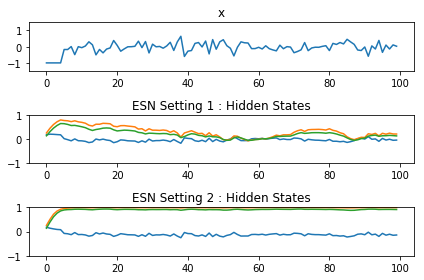

In [628]:
def plot_data_and_hidden_states(data, states_arr=[res_default[0], res_norm_W_rec[0]], index=0):
    plt.subplot(3,1, 1)
    plt.title("x")
    plt.plot(data[index, :])
    plt.ylim([-1.5,1.5])


    for i, states in enumerate(states_arr):
        plt.subplot(3,1, 2+i)
        plt.title('ESN Setting %d : Hidden States' % (i+1))
        for i in range(states.shape[1]):
            plt.plot(states[index, i, :])
            plt.ylim([-1,1])
    plt.tight_layout()
plot_data_and_hidden_states(X, index=1)

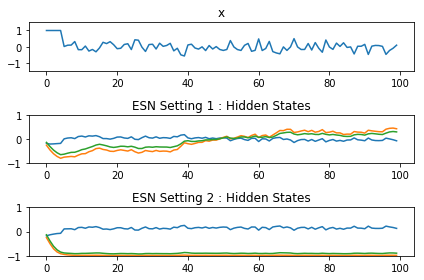

In [630]:
plot_data_and_hidden_states(X, index=9)

In [416]:
def plot_3d_plotly(data, title=''):

    phi_X = data[:, :, -1]
    class_1 = phi_X[:3]
    class_2 = phi_X[-3:]
    cl_dict = {
        'sin': 'r',
        'bin': 'b'
    }
    
    
    data = []
    for c, cl in zip(('sin','bin'), (class_1, class_2)):
        trace = go.Scatter3d(
            x=cl[:, 0], y=cl[:, 1], z=cl[:, 2],
            mode='markers',
            marker=dict(
                size=12,
                line=dict(
                    color=cl_dict[c],
                    width=0.5
                ),
                opacity=0.8
            ),
            name=c
        )
        data.append(trace)
    layout = go.Layout(
        margin=dict(
            l=0,
            r=0,
            b=0,
            t=0
        )
    )
    fig = go.Figure(data=data, layout=layout)
    return fig

In [417]:
fig = plot_3d_plotly(res_naive[0], title="$\phi(x)$")
py.iplot(fig, filename='simple-3d2-scatter')

In [428]:
fig = plot_3d_plotly(res_better[0], title="$\phi(x)$")
py.iplot(fig, filename='simple-3d22-scatter')